In [159]:
# importing libraries:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# read the dataset:
customer_dataset = pd.read_csv('Mall_Customers.csv')
customer_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
customer_dataset.info(),
customer_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


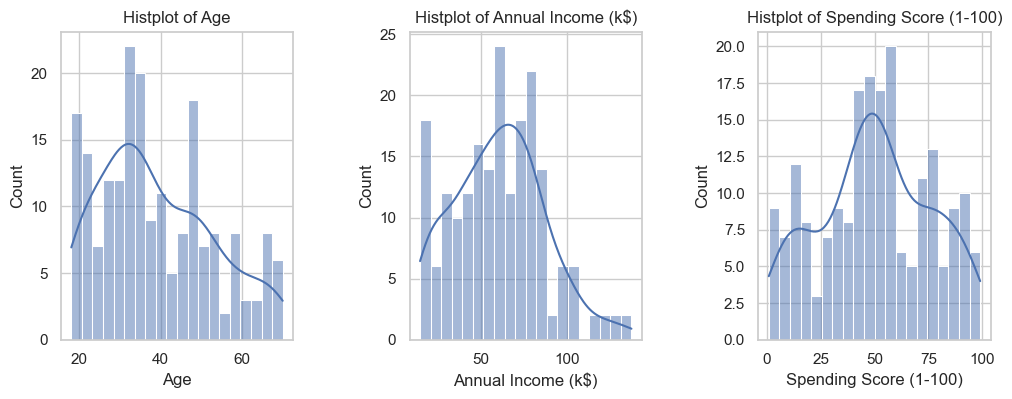

In [167]:
# Drop unnecessary columns
customer_dataset.drop("CustomerID", axis=1, inplace=True)


# Distribution of Age, Income, Spending Score
plt.figure(1, figsize=(12,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.histplot(customer_dataset[x], bins = 20, kde = True)
  plt.title('Histplot of {}'.format(x))
plt.show()

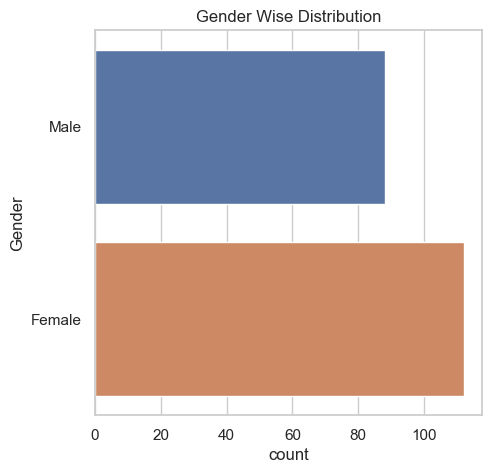

In [169]:
plt.figure(figsize=(5,5))
sns.countplot(y = 'Gender' , data = customer_dataset, hue='Gender', palette='deep')
plt.title('Gender Wise Distribution')
plt.show()

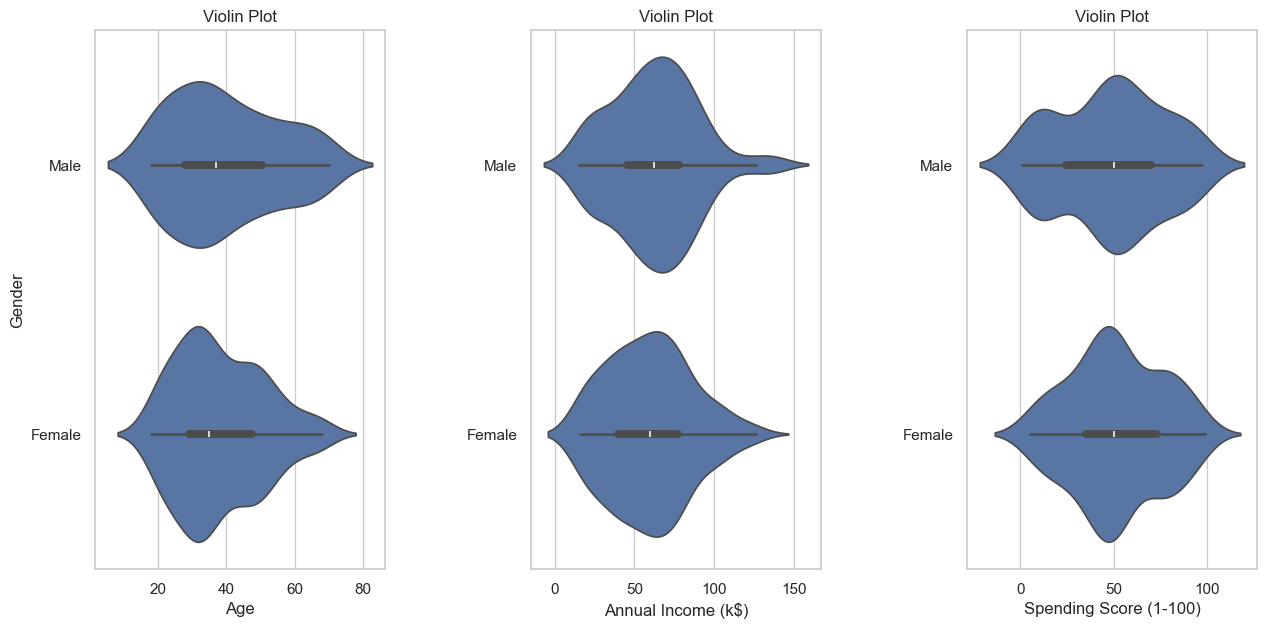

In [173]:
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.violinplot(x = cols,y = 'Gender', data = customer_dataset)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Violin Plot')
plt.show()

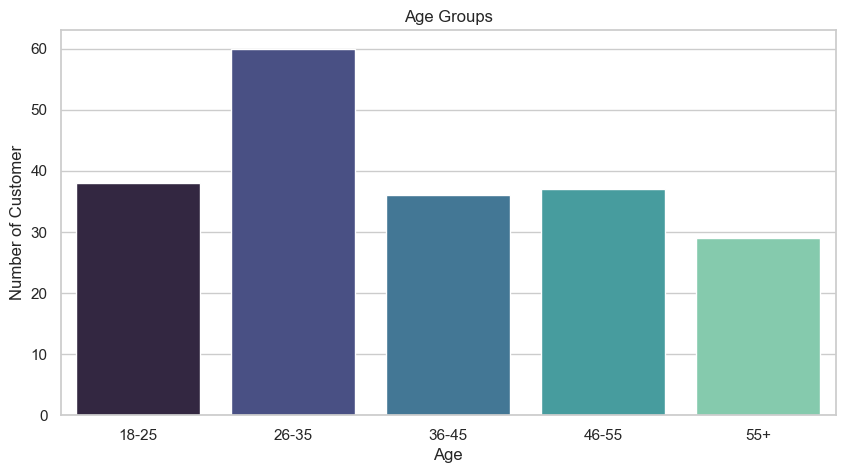

In [175]:
age_18_25 = customer_dataset.Age[(customer_dataset.Age >= 18) & (customer_dataset.Age <= 25)]
age_26_35 = customer_dataset.Age[(customer_dataset.Age >= 26) & (customer_dataset.Age <= 35)]
age_36_45 = customer_dataset.Age[(customer_dataset.Age >= 36) & (customer_dataset.Age <= 45)]
age_46_55 = customer_dataset.Age[(customer_dataset.Age >= 46) & (customer_dataset.Age <= 55)]
age_above_55 = customer_dataset.Age[(customer_dataset.Age >= 56)]

agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (10,5))
sns.barplot(x = agex, y = agey ,hue=agex, palette='mako')
plt.title('Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

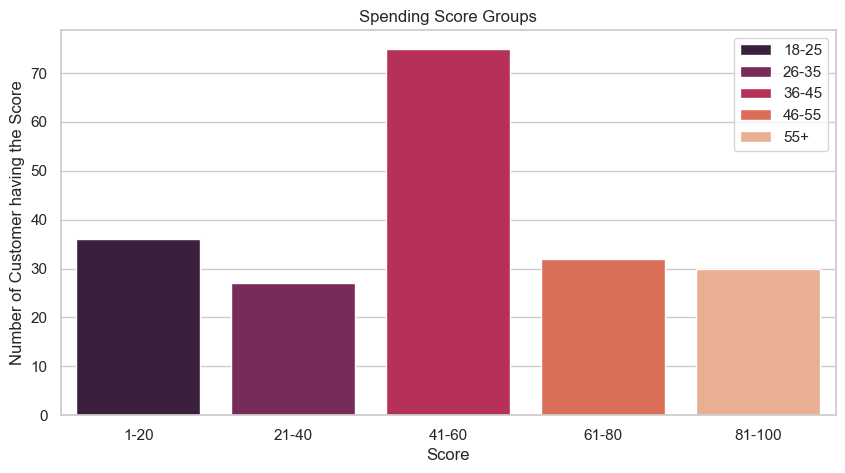

In [177]:
# Creating groups of ‘Spending Score’ column and visualizing it:
ss_1_20 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 1) & (customer_dataset['Spending Score (1-100)'] <= 20)]
ss_21_40 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 21) & (customer_dataset['Spending Score (1-100)'] <= 40)]
ss_41_60 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 41) & (customer_dataset['Spending Score (1-100)'] <= 60)]
ss_61_80 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 61) & (customer_dataset['Spending Score (1-100)'] <= 80)]
ss_81_100 = customer_dataset['Spending Score (1-100)'][(customer_dataset['Spending Score (1-100)'] >= 81) & (customer_dataset['Spending Score (1-100)'] <= 100)]
ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(10,5))
sns.barplot(x = ssx, y = ssy,hue=agex, palette='rocket')
plt.title('Spending Score Groups')
plt.xlabel('Score')
plt.ylabel('Number of Customer having the Score')
plt.show()

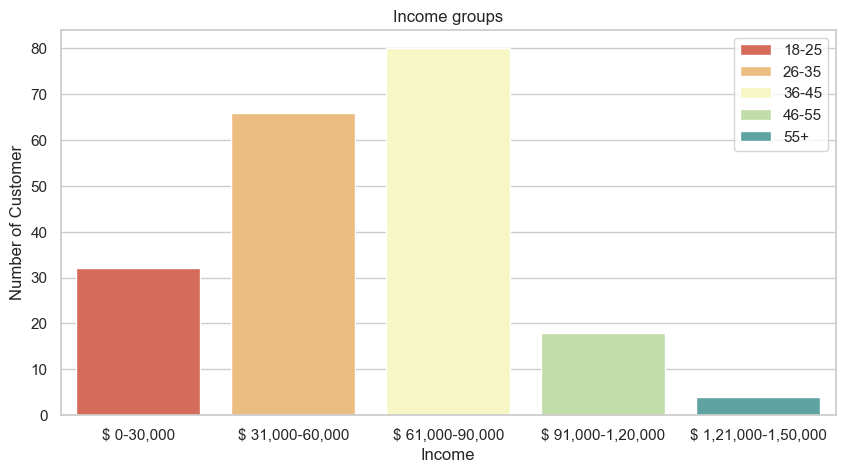

In [179]:
# Creating groups for ‘Annual Income’ column and visualizing it:
ann_0_30 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 0 ) & (customer_dataset['Annual Income (k$)'] <= 30)]
ann_31_60 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 31 ) & (customer_dataset['Annual Income (k$)'] <= 60)]
ann_61_90 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 61 ) & (customer_dataset['Annual Income (k$)'] <= 90)]
ann_91_120 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 91 ) & (customer_dataset['Annual Income (k$)'] <= 120)]
ann_121_150 = customer_dataset['Annual Income (k$)'][(customer_dataset['Annual Income (k$)'] >= 121 ) & (customer_dataset['Annual Income (k$)'] <= 150)]
annx = ['$ 0-30,000','$ 31,000-60,000','$ 61,000-90,000','$ 91,000-1,20,000','$ 1,21,000-1,50,000']
anny = [len(ann_0_30.values),len(ann_31_60.values),len(ann_61_90.values),len(ann_91_120.values),len(ann_121_150.values)]
plt.figure(figsize=(10,5))
sns.barplot(x = annx, y = anny, hue=agex, palette='Spectral')
plt.title('Income groups')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.show()

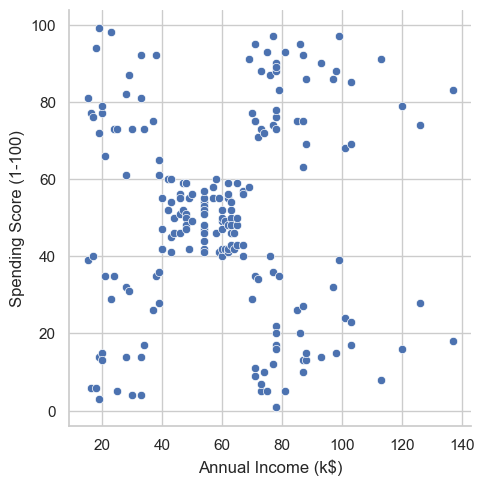

In [181]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = customer_dataset)

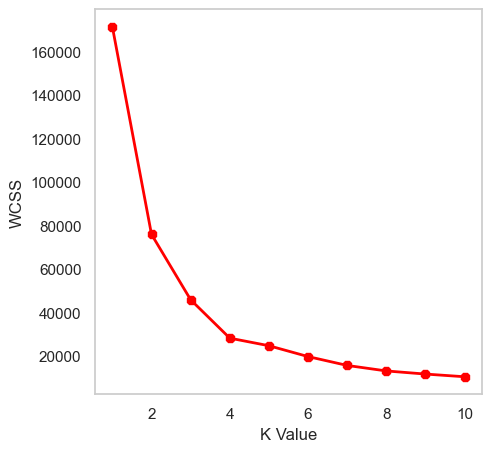

In [183]:
# Creating Clusters based on Age and Spending Score:
X1 = customer_dataset.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(5,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [185]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)

print(label)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


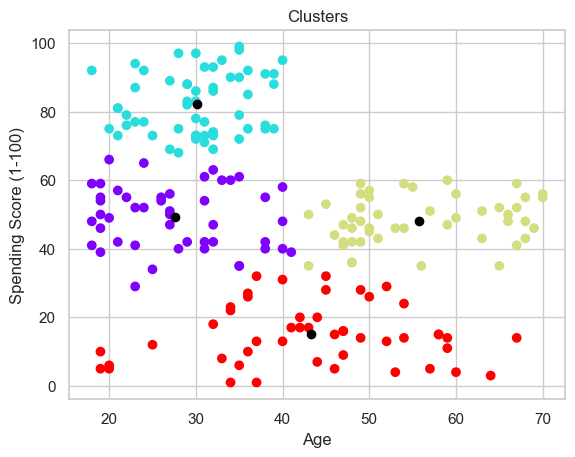

In [187]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

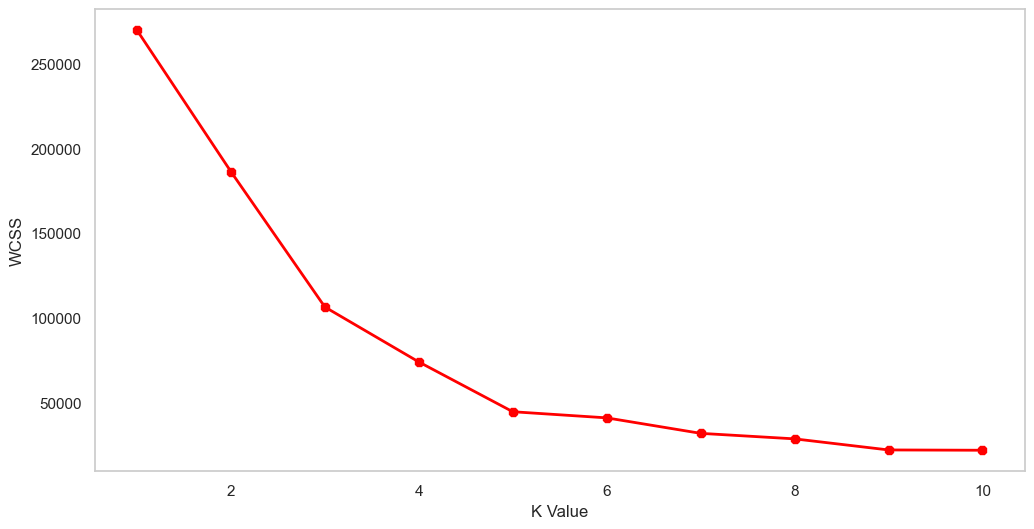

In [189]:
# Creating Clusters based on Annual Income and Spending Score:
X2 = customer_dataset.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

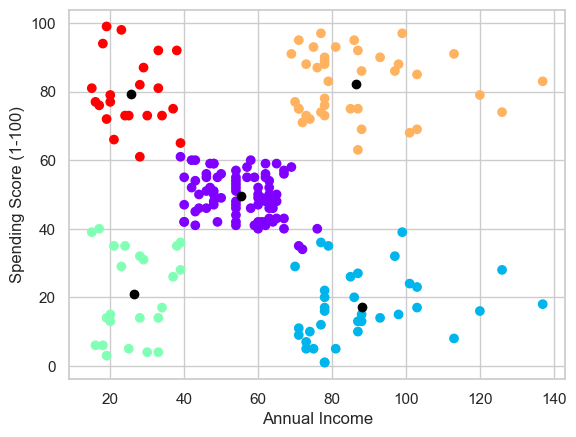

In [191]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)

plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

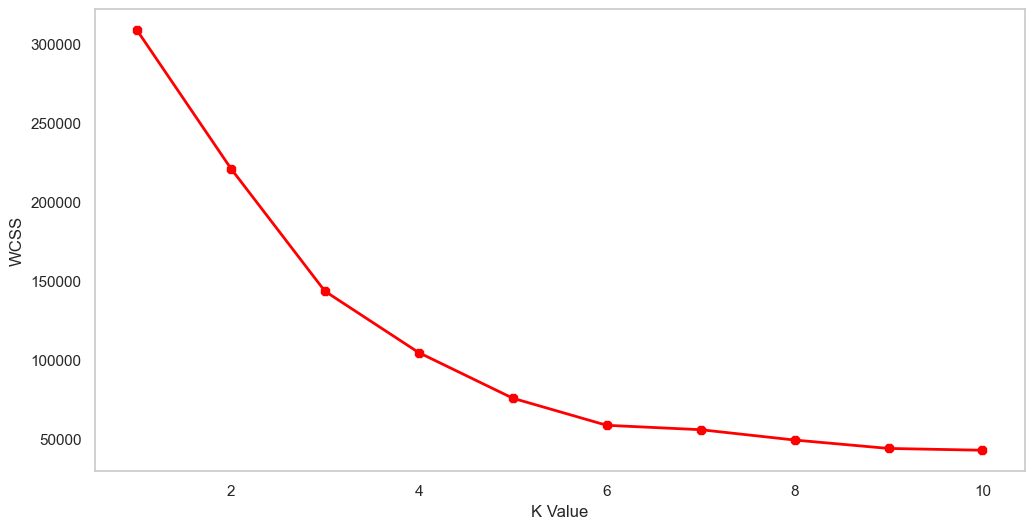

In [193]:
# Creating a Clusters based on Age, Annual Income, and Spending Score:
X3 = customer_dataset.iloc[:,1:]

wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

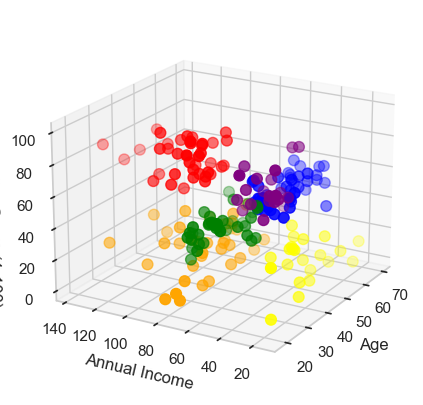

In [195]:
kmeans = KMeans(n_clusters = 6)
label = kmeans.fit_predict(X3)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans.fit_predict(X3)
customer_dataset['label'] = clusters


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(customer_dataset.Age[customer_dataset.label == 0], customer_dataset['Annual Income (k$)'][customer_dataset.label == 0], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 0], c = 'blue', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 1], customer_dataset['Annual Income (k$)'][customer_dataset.label == 1], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 1], c = 'red', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 2], customer_dataset['Annual Income (k$)'][customer_dataset.label == 2], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 2], c = 'green', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 3], customer_dataset['Annual Income (k$)'][customer_dataset.label == 3], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 3], c = 'orange', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 4], customer_dataset['Annual Income (k$)'][customer_dataset.label == 4], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 4], c = 'purple', s = 60)
ax.scatter(customer_dataset.Age[customer_dataset.label == 5], customer_dataset['Annual Income (k$)'][customer_dataset.label == 5], customer_dataset['Spending Score (1-100)'][customer_dataset.label == 5], c = 'yellow', s = 60)
ax.view_init(20,210)

plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()